#Notebook refers to the Practical Work at Module 3 IGTI Bootcamp Machine Learning.

Practical Work - The IRIS dataset
1. Class samples: 50 
2. Dimensionality: 4
3. Features type: Positive real numbers

The IRIS data set is perhaps the most classic of the classification algorithm test sets. It divides plant samples into three different species and has, as features, the height and width of two parts of the plant: the sepal and the petals

The objective is to generate two models and compare them using the appropriate quality metrics and techniques to make them robust. It is necessary to consult the scikit-learn documentation to do this job.

The work has as main objectives:
1. Use two classification algorithms to solve a problem.
2. Analyze this problem using quality metrics, comparing the solutions.
3. Make the solution of the problem more robust with the use of cross-validation and search for hyperparameters.
4. Building and Compare the Confusion Matrix


In [ ]:
#download the dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[:, :2] # getting the features
y = iris.target


y[0] # first element class
X[:1, :] # first element to classify



array([[5.1, 3.5]])

1. Split the dataset into training and testing.
2. Training the Classifier and test its performance


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**Loading and training Random Forest Classifier**

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [ ]:
#random forest metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score

rfc_acc = round(accuracy_score(y_test, y_pred), 4)
rfc_recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
rfc_precision = round(precision_score(y_test, y_test, y_pred, average='weighted'), 4)

**Plotting the Confusion Matrix using RANDOM FOREST**

Confusion Matrix (Random Forest) with no Normalization
[[19  0  0]
 [ 0  8  5]
 [ 0  5  8]]
Confusion Matrix (Random Forest) Normalized
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.38 0.62]]


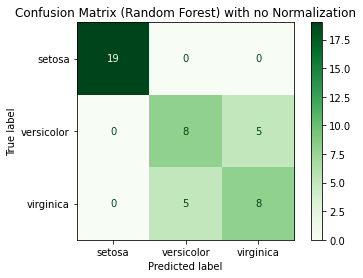

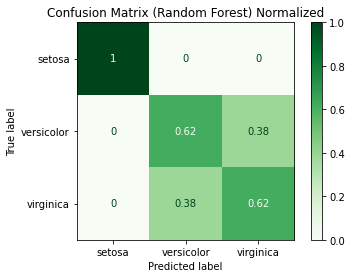

In [ ]:
# Plotting RandomForest Confusion Matrix
np.set_printoptions(precision=2)
class_names = iris.target_names
matrix_titles = [("Confusion Matrix (Random Forest) with no Normalization", None),
                  ("Confusion Matrix (Random Forest) Normalized", 'true')]
for title, normalize in matrix_titles:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Loading and training KNN Classifier**

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
#knn metrics
knn_acc = round(accuracy_score(y_test, y_pred), 4) 
knn_recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
knn_precision = round(precision_score(y_test, y_test, y_pred, average='weighted'), 4)

**Plotting the Confusion Matrix using KNN(KNeighborsClassifier)**

Confusion Matrix (KNN) with no Normalization
[[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]
Confusion Matrix (KNN) Normalized
[[1.   0.   0.  ]
 [0.   0.54 0.46]
 [0.   0.38 0.62]]


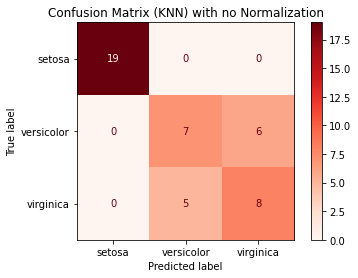

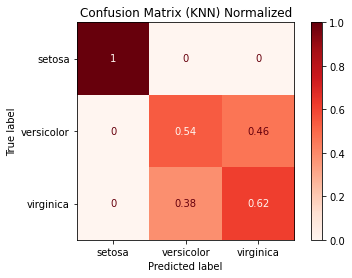

In [ ]:
# Plotting KNN Confusion Matrix
np.set_printoptions(precision=2)
class_names = iris.target_names
matrix_titles = [("Confusion Matrix (KNN) with no Normalization", None),
                  ("Confusion Matrix (KNN) Normalized", 'true')]
for title, normalize in matrix_titles:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Comparing the metrics (KNN versus Random Forest)

In [ ]:
print("KNN vs Random Forest\n")
print("Classes: {0}\n".format(iris.target_names))
print("Acccuracy: {0} vs {1}".format(knn_acc, rfc_acc))
print("Recall: {0} vs {1}".format(knn_recall, rfc_recall))
print("Precision: {0} vs {1}".format(knn_precision, rfc_precision))

KNN vs Random Forest

Classes: ['setosa' 'versicolor' 'virginica']

Acccuracy: 0.7556 vs 0.7778
Recall: 0.7556 vs 0.7778
Precision: 1.0 vs 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
cv_rfc = cross_val_score(rfc, X, y)
cv_knn = cross_val_score(knn, X, y)
print("\nCross Validation: {0} vs {1}".format(cv_knn, cv_rfc))


Cross Validation: [0.67 0.8  0.63 0.87 0.67] vs [0.7  0.73 0.73 0.87 0.77]


In [ ]:
sum_cv_rfc = 0
for cv_score in cv_rfc:
  sum_cv_rfc += cv_score

print("Random Forest Result: {0}".format(sum_cv_rfc/5))


Random Forest Result: 0.76


In [ ]:
sum_cv_knn = 0
for cv_score in cv_knn:
  sum_cv_knn += cv_score

print("\KNN Result: {0}".format(sum_cv_knn/5))

\KNN Result: 0.7266666666666667


Working with Hyperparameters

In [ ]:
# searching hyperparameters
from sklearn.model_selection import GridSearchCV

#RFC
parameters = {'min_samples_split':(2,6)}
rfc_hps = GridSearchCV(rfc, parameters)
rfc_hps.fit(X, y)
print("Best value for min_samples_split: {0}".format(rfc_hps.best_params_['min_samples_split']))


Best value for min_samples_split: 6


In [ ]:
#KNN
parameters = {'n_neighbors':(1,20)}
knn_hps = GridSearchCV(knn, parameters)
knn_hps.fit(X , y)
knn_hps.best_params_['n_neighbors']
print("Best value for n_neighbors: {0}".format(knn_hps.best_params_['n_neighbors']))

Best value for n_neighbors: 20


**Notes:**
1. Although normalization could be applied as part of preprocessing of data,  it was decided to do it when plotting the confusion matrix for each classifier. So, we can observe in the figure of plots the Confusion Matrix without normalization and with it in order to help us to have good visualization and a better interpretation for each class of elements of Iris dataset.

2. Off course that evaluating a machine learning model is a fundamental in any project. However, generally speaking,  the overall accuracy can be a deceptive measure, despite of the model give to us a great results. This can actually be a big problem in machine learning. A machine learning model is trully evaluated on how it performs in the real world when applied for new datasets. 